In [1]:
#Problem 1

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#1st col is userid, 2nd col is movieid, 3rd col is rating, 4th col is timestamp
dataset = pd.read_csv('ratings.csv')

X = dataset.iloc[:,:].values

total_user = len(np.unique(X[:,0]))

total_movie = len(np.unique(X[:,1]))

available_ratings = len((X[:,1]))

possible_ratings = total_user*total_movie

print(available_ratings)
print(possible_ratings)

sparsity = (available_ratings+0.0)/ possible_ratings

print("Sparsity is:%f" %sparsity)

100004
6083286
Sparsity is:0.016439


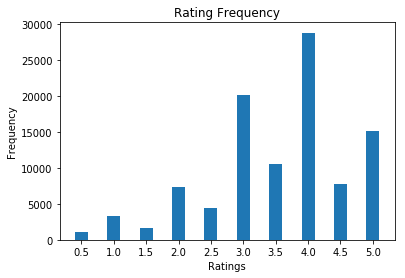

It can be concluded that most of ratings are in interval 3.0 - 5.0.
The rating with score 4 appears most frequent.
The rating with score 0.5 appears least frequent.


In [2]:
#Problem 2

ratings, counts = np.unique(X[:,2], return_counts=True)

x_values = ratings

y_values = counts

plt.bar(x_values,y_values,width = 0.2, tick_label=ratings)
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title("Rating Frequency")
plt.show()
print("It can be concluded that most of ratings are in interval 3.0 - 5.0.")
print("The rating with score 4 appears most frequent.")
print("The rating with score 0.5 appears least frequent.")

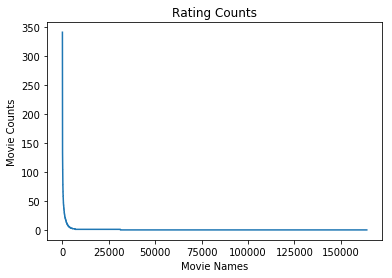

In [3]:
#Problem 3

movie_names,movie_counts = np.unique(X[:,1], return_counts=True)

movie_tuples = []
for i in range(0,len(movie_names)):
    movie_tuple = movie_names[i],movie_counts[i]
    movie_tuples.append(movie_tuple)
    

movie_tuples_sorted = sorted(movie_tuples,key = lambda movie_tuple: movie_tuple[1], reverse=True)

moive_names, movie_counts = zip(*movie_tuples_sorted)

plt.plot(movie_names,movie_counts)
plt.xlabel("Movie Names")
plt.ylabel("Movie Counts")
plt.title("Rating Counts")
plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import KNNWithMeans
from surprise import accuracy
from surprise.model_selection import KFold

# Problem 15

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


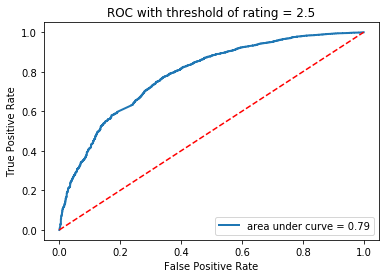

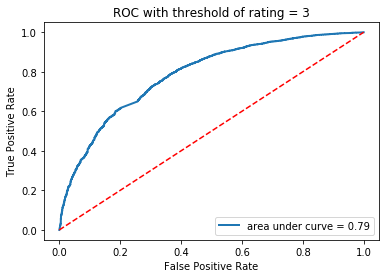

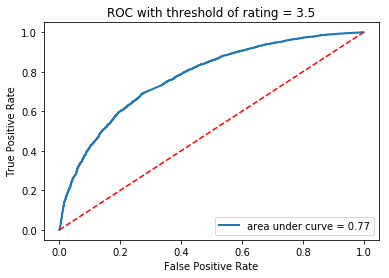

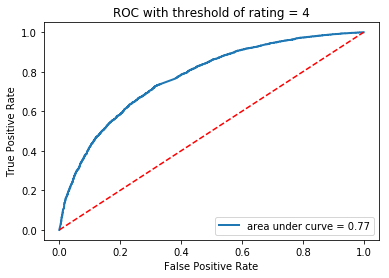

In [21]:
from sklearn.metrics import roc_curve, auc
from surprise.model_selection import train_test_split
%matplotlib inline

thresholds = [2.5, 3, 3.5, 4]

algo = KNNWithMeans(k=25, sim_options={'name': 'pearson_baseline'})

trainset, testset = train_test_split(data, test_size=0.1, random_state=42)

algo.fit(trainset)

predictions = algo.test(testset)

predicted_labels = []
for prediction in predictions:
    predicted_labels.append(prediction.est)



for th in thresholds:
    testset_labels = []
    for record in testset:
        if record[2] >= th:
            label = 1
        else:
            label = 0
        testset_labels.append(label)
    fig, ax = plt.subplots()
    fpr, tpr, thresholds = roc_curve(testset_labels, predicted_labels)

    area_under_roc = auc(fpr,tpr)
    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.2f' % area_under_roc)
    ax.plot([0,1], [0,1], 'r--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC with threshold of rating = {}'.format(th))
    ax.legend(loc="lower right")

# Problem 24


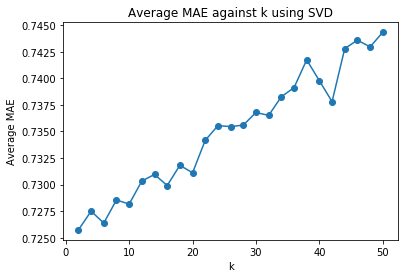

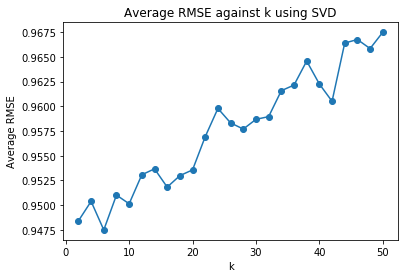

Minimum average MAE is 0.725742529028 optimal k is 2
Minimum average RMSE is 0.947484396396 optimal k is 6


In [8]:
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.model_selection.validation import cross_validate
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import KFold

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader()

data = Dataset.load_from_df(dataset[['userId', 'movieId', 'rating']], reader)


# number of latent factors
n_factors = np.arange(2, 52, 2)

# number of splits in corss validation
KFOLD = 10

avg_mae_scores = []
avg_rmse_scores = []
for k in n_factors:
    svd =  SVD(n_factors=k, biased=False, random_state=42)
    results = cross_validate(svd, data, measures=[u'rmse', u'mae'], cv=KFOLD)
    avg_mae_scores.append(np.average(results['test_mae']))
    avg_rmse_scores.append(np.average(results['test_rmse']))
    
plt.plot(n_factors, avg_mae_scores, '-o')
plt.xlabel("k")
plt.ylabel("Average MAE")
plt.title("Average MAE against k using SVD")
plt.show()

plt.plot(n_factors, avg_rmse_scores, '-o')
plt.xlabel('k')
plt.ylabel('Average RMSE')
plt.title('Average RMSE against k using SVD')
plt.show()

print('Minimum average MAE is', min(avg_mae_scores),
      'optimal k is', n_factors[avg_mae_scores.index(min(avg_mae_scores))])

print('Minimum average RMSE is', min(avg_rmse_scores),
      'optimal k is', n_factors[avg_rmse_scores.index(min(avg_rmse_scores))])

# Problem 25

In [9]:

optimal_k = 6
KFOLD = 10
svd =  SVD(n_factors=optimal_k, biased=False, random_state=42)
results = cross_validate(nmf, data, measures=[u'rmse', u'mae'], cv=10)
print('When k = 6, minimum average MAE is ', np.average(results['test_mae']))
print('When k = 6, minimum average RMSE is ', np.average(results['test_rmse']))


When k = 6, minimum average MAE is  0.727182512535
When k = 6, minimum average RMSE is  0.948641321929


# Problem 26

Minimum average rmse is 0.670272206435


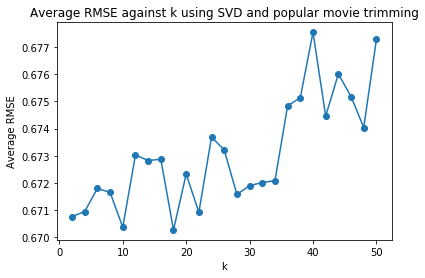

In [13]:
from surprise.model_selection import KFold
from surprise import accuracy

def popular_movie_trimming(testset):
    movieId_count = {}
    for record in testset:
        if record[1] not in movieId_count.keys():
            movieId_count[record[1]] = 1
        else:
            movieId_count[record[1]] = movieId_count[record[1]] + 1
    testset[:] = [record for record in testset if movieId_count[record[1]] > 2]
    


# A reader is still needed but only the rating_scale param is requiered.
reader = Reader()

data = Dataset.load_from_df(dataset[['userId', 'movieId', 'rating']], reader)


# number of latent factors
n_factors = np.arange(2, 52, 2)

avg_mae = []
avg_rmse = []

# define a cross-validation iterator
kf = KFold(n_splits=10, random_state=42)



for k in n_factors:
    algo = SVD(n_factors=k, biased=False, random_state=42)
    mae_list = []
    rmse_list = []

    for trainset, testset in kf.split(data):
        # train and test algorithm.
        algo.fit(trainset)
        popular_movie_trimming(testset)
        predictions = algo.test(testset)

        # Compute Root Mean Squared Error and MAE
        mae_list.append(accuracy.rmse(predictions, verbose=False))
        rmse_list.append(accuracy.mae(predictions, verbose=False))
    avg_mae.append(np.average(mae_list))
    avg_rmse.append(np.average(rmse_list))


print('Minimum average rmse is', min(avg_rmse))

plt.plot(n_factors, avg_rmse, '-o')
plt.xlabel('k')
plt.ylabel('Average RMSE')
plt.title('Average RMSE against k using SVD and popular movie trimming')
plt.show()

# Problem 27

Minimum average rmse is 0.855906892249


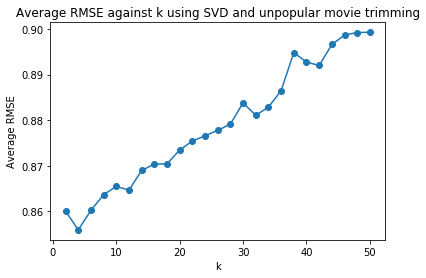

In [14]:
def unpopular_movie_trimming(testset):
    movieId_count = {}
    for record in testset:
        if record[1] not in movieId_count.keys():
            movieId_count[record[1]] = 1
        else:
            movieId_count[record[1]] = movieId_count[record[1]] + 1
    testset[:] = [record for record in testset if movieId_count[record[1]] <= 2]
    
    
# number of latent factors
n_factors = np.arange(2, 52, 2)


avg_rmse = []

# define a cross-validation iterator
kf = KFold(n_splits=10, random_state=42)


for k in n_factors:
    algo = SVD(n_factors=k, biased=False, random_state=42)

    rmse_list = []

    for trainset, testset in kf.split(data):
        # train and test algorithm.
        algo.fit(trainset)
        unpopular_movie_trimming(testset)
        predictions = algo.test(testset)

        # Compute Root Mean Squared Error
        rmse_list.append(accuracy.mae(predictions, verbose=False))
    
    avg_rmse.append(np.average(rmse_list))

print('Minimum average rmse is', min(avg_rmse))

plt.plot(n_factors, avg_rmse, '-o')
plt.xlabel('k')
plt.ylabel('Average RMSE')
plt.title('Average RMSE against k using SVD and unpopular movie trimming')
plt.show()

# Problem 28

Minimum average rmse is 0.681440108235


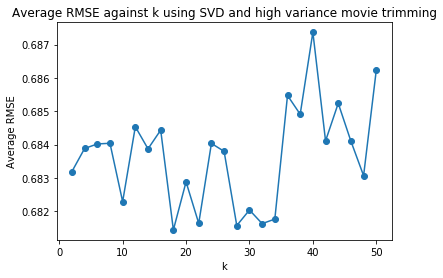

In [15]:
def high_variance_movie_trimming(testset):
    movie_ratings = {}
    
    for record in testset:
        if record[1] not in movie_ratings.keys():
            movie_ratings[record[1]] = [record[2]]
        else:
            movie_ratings[record[1]].append(record[2])
            
    testset[:] = [record for record in testset
                  if len(movie_ratings[record[1]]) >= 5 or
                  np.var(movie_ratings[record[1]]) >= 2]

    
# number of latent factors
n_factors = np.arange(2, 52, 2)


avg_rmse = []

# define a cross-validation iterator
kf = KFold(n_splits=10, random_state=42)


for k in n_factors:
    algo = SVD(n_factors=k, biased=False, random_state=42)

    rmse_list = []

    for trainset, testset in kf.split(data):
        # train and test algorithm.
        algo.fit(trainset)
        high_variance_movie_trimming(testset)
        predictions = algo.test(testset)

        # Compute Root Mean Squared Error and MAE
        rmse_list.append(accuracy.mae(predictions, verbose=False))

    avg_rmse.append(np.average(rmse_list))

print('Minimum average rmse is', min(avg_rmse))

plt.plot(n_factors, avg_rmse, '-o')
plt.xlabel('k')
plt.ylabel('Average RMSE')
plt.title('Average RMSE against k using SVD and high variance movie trimming')
plt.show()

# Problem 29

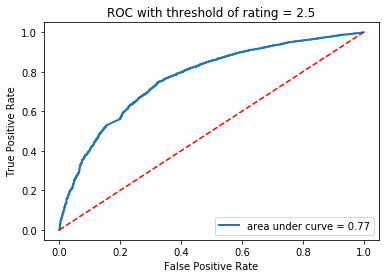

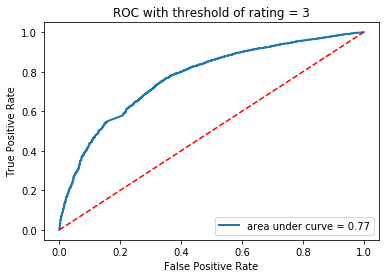

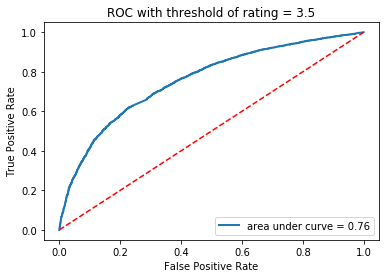

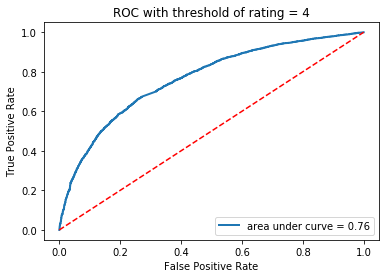

In [16]:
from sklearn.metrics import roc_curve, auc
from surprise.model_selection import train_test_split
%matplotlib inline

thresholds = [2.5, 3, 3.5, 4]

algo = SVD(n_factors=6, biased=False, random_state=42)

trainset, testset = train_test_split(data, test_size=0.1, random_state=42)

algo.fit(trainset)

predictions = algo.test(testset)

predicted_labels = []
for prediction in predictions:
    predicted_labels.append(prediction.est)



for th in thresholds:
    testset_labels = []
    for record in testset:
        if record[2] >= th:
            label = 1
        else:
            label = 0
        testset_labels.append(label)
    fig, ax = plt.subplots()
    fpr, tpr, thresholds = roc_curve(testset_labels, predicted_labels)

    area_under_roc = auc(fpr,tpr)
    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.2f' % area_under_roc)
    ax.plot([0,1], [0,1], 'r--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC with threshold of rating = {}'.format(th))
    ax.legend(loc="lower right")

# Problem 30